In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

# Profiling

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#there is three class like train ac 2s and ...
#sibling spauch
#kya apne bachhe ke sath tha

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.shape

(891, 12)

In [7]:
test.shape

(418, 11)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
#if any column 40% data missing hai to bhai htao nhi to bnane ke chakkr me bigar dega

In [11]:
train.drop(columns=['Cabin'] , inplace=True)
test.drop(columns=['Cabin'] , inplace=True)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [14]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False


In [15]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [16]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [17]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [18]:
train['Embarked'].fillna('S' , inplace=True)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
#test['fare'].fillna(test['fare'].mean() , inplace=True)

In [20]:
train.drop(columns=['Fare'] , inplace=True)
test.drop(columns=['Fare'] , inplace=True)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 69.7+ KB


In [22]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Embarked        0
dtype: int64

In [23]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [ ]:
#now age column for both train and test

In [24]:
train_age=np.random.randint(train['Age'].mean()-train['Age'].std() , train['Age'].mean()+train['Age'].std() , 177)

In [25]:
test_age=np.random.randint(test['Age'].mean()-test['Age'].std() , test['Age'].mean()+test['Age'].std() , 86)

In [26]:
train['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [27]:
train['Age'][train['Age'].isnull()]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [28]:
train['Age'][train['Age'].isnull()].shape

(177,)

In [29]:
train['Age'][train['Age'].isnull()]=train_age

C:\Users\91825\AppData\Local\Temp/ipykernel_11628/4268069075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()]=train_age


In [30]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
dtype: int64

In [31]:
test['Age'][test['Age'].isnull()]=test_age

C:\Users\91825\AppData\Local\Temp/ipykernel_11628/3484201817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()]=test_age


In [32]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
dtype: int64

# EDA

In [ ]:
#har column uthao aur dekho iska kita importance hai

In [33]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [ ]:
#there is 62% chance to servive in pclass 1 and 47 % chance in pclass 2

In [34]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [35]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [36]:
train.groupby(['Parch'])['Survived'].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [38]:
train.groupby(['SibSp'])['Survived'].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

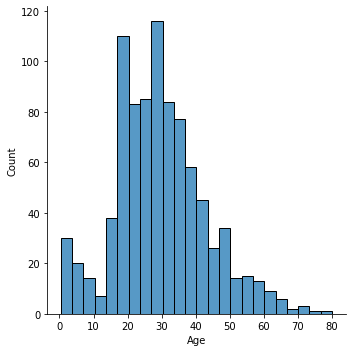

In [39]:
sns.displot(train['Age'])

C:\Users\91825\AppData\Local\Temp/ipykernel_11628/3366457986.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train['Age'], shade=True)


<AxesSubplot:xlabel='Age', ylabel='Density'>

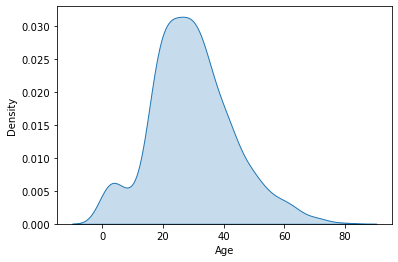

In [41]:
import seaborn as sns

# Assuming 'age' is a column in your 'train' DataFrame
sns.kdeplot(train['Age'], shade=True)


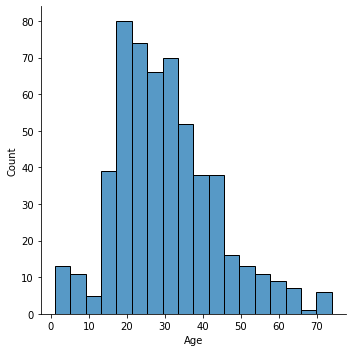

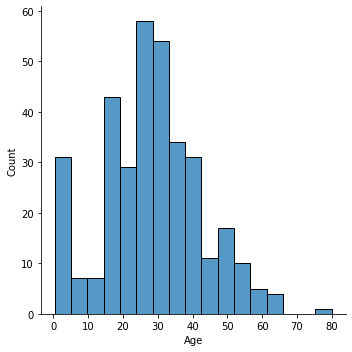

In [43]:
sns.displot(train['Age'][train['Survived']==0])
sns.displot(train['Age'][train['Survived']==1])


In [44]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Embarked'],
      dtype='object')

In [45]:
train.drop(columns='Ticket' , inplace=True)
test.drop(columns='Ticket' , inplace=True)

In [46]:
train['family'] = train['SibSp']+train['Parch']+1

In [47]:
train['family'].value_counts()

family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [48]:
train.groupby(['family'])['Survived'].mean()

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [49]:
test['family'] = test['SibSp']+test['Parch']+1

In [50]:
def cal(number):
    if number==1:
        return 'alone'
    elif number>2 and number<5:
        return 'medium'
    else:
        return 'large'

In [51]:
train['family_size']=train['family'].apply(cal)

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,family,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,2,large
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,2,large
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,1,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,2,large
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,1,alone


In [53]:
test['family_size']=test['family'].apply(cal)

In [54]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,family,family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,Q,1,alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,S,2,large
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,Q,1,alone
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,S,1,alone
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,S,3,medium


In [55]:
train.drop(columns=['SibSp' ,'Parch' ,'family'] , inplace=True)
test.drop(columns=['SibSp' ,'Parch' ,'family'] , inplace=True)

In [56]:
train.shape

(891, 8)

In [57]:
test.shape

(418, 7)

In [58]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,S,large
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C,large
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,S,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S,large
4,5,0,3,"Allen, Mr. William Henry",male,35.0,S,alone


In [59]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,Embarked,family_size
0,892,3,"Kelly, Mr. James",male,34.5,Q,alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,S,large
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,Q,alone
3,895,3,"Wirz, Mr. Albert",male,27.0,S,alone
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,S,medium


In [60]:
passengerId=test['PassengerId'].values

In [62]:
train.drop(columns=['Name', 'PassengerId'] , inplace=True)
test.drop(columns=['Name' , 'PassengerId'] , inplace=True)

In [63]:
train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Embarked       0
family_size    0
dtype: int64

In [64]:
#pclass sex embark and family size is categorical  -- algo sirf numerical value accept krta hai 


In [65]:
#to hmko change krna hoga
# s-1
# c-2
# q-3

#label incoding that means jita categories uta column-- model overfitting

In [66]:
train.shape

(891, 6)

In [67]:
train=pd.get_dummies(train , columns=['Pclass' , 'Sex' ,'Embarked' ,'family_size'],drop_first=True)

In [68]:
train.shape

(891, 9)

In [69]:
test=pd.get_dummies(test , columns=['Pclass' , 'Sex' ,'Embarked' ,'family_size'],drop_first=True)

In [70]:
test

,Age,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_large,family_size_medium
0,34.5,False,True,True,True,False,False,False
1,47.0,False,True,False,False,True,True,False
2,62.0,True,False,True,True,False,False,False
3,27.0,False,True,True,False,True,False,False
4,22.0,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...
413,23.0,False,True,True,False,True,False,False
414,39.0,False,False,False,False,False,False,False
415,38.5,False,True,True,False,True,False,False
416,35.0,False,True,True,False,True,False,False


In [71]:
X=train.iloc[:,1:].values
y=train.iloc[:,0].values

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
classifier=DecisionTreeClassifier()

In [76]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [77]:
y_pred=classifier.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score


In [79]:
accuracy_score(y_pred , y_test)

0.7653631284916201

In [80]:
Xf=test.iloc[:,:].values


In [81]:
y_final=classifier.predict(Xf)

In [82]:
y_final.shape

(418,)

In [83]:
final=pd.DataFrame()

In [85]:
final['passengerId']=passengerId
final['Survived']=y_final

In [86]:
final.to_csv('titanic_submission.csv' ,index=False)